<a href="https://colab.research.google.com/github/abdullatif14/KNN-and-Naive-Bayes-week9/blob/main/KNN_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Questions


##a)Specifying the Questions

Identifying whether a passenger survived titanic or not

##b)Defining the metric for success
•Data modelling

•K-Nearest Neighbour(KNN)

•LDA

##c)Understanding the Context

The titanic was one of the largest boats in England however it hit a rock and the ship sunk. This led to many deaths as not everyone was bale to make it to safety. We would like to take this opportunity to predict whether someone would survive given where they embarked from , their class , and the gender.

##d)Recording the Experimental design

•Clean the dataset

•Perform exploratory analysis

•Implement the soloution

•Challenge the soloution

##Loading and Reading our Datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def read_csv (url):
  data = pd.read_csv(url)
  return data
  

In [6]:
test = read_csv('/content/test (1).csv')
print(test.shape)

print(test.head())


(418, 11)
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [7]:
train = read_csv('/content/train (5).csv')
print(train.shape)

print(train.head())

(891, 12)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


**Data Cleanining**

Train Dataset


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print(train.isnull().sum())
print(train.fillna(0, inplace=True))


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
None


In [10]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [45]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [47]:
#Dropping unnecesary columns
df1 = train.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


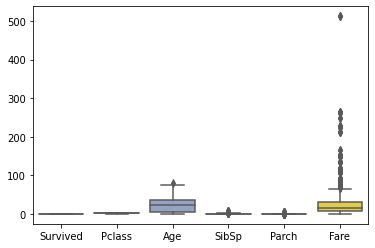

In [48]:
#lets plot outliers
ax = sns.boxplot(data=df1, orient="v", palette="Set2")


In [49]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Univariate Analysis**

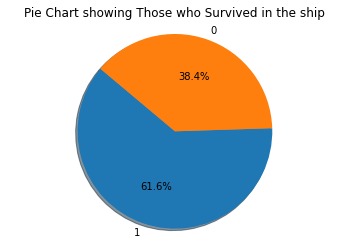

In [50]:
vals = df1['Survived'].value_counts()
vals
names = ['1','0']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing Those who Survived in the ship')
plt.show()

(array([227.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

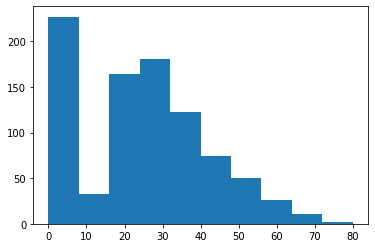

In [51]:
plt.hist(df1['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


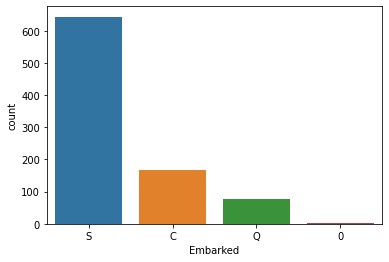

In [52]:

# Getting the count of the people who mounted at the different places 
sns.countplot(df1['Embarked'])

**Bivariate Analysis**

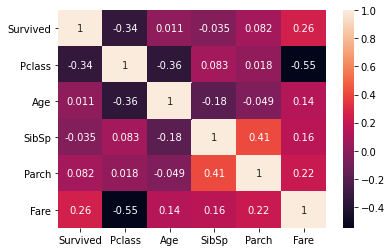

In [53]:
# Lets check for correlations
#
sns.heatmap(df1.corr(),annot=True)

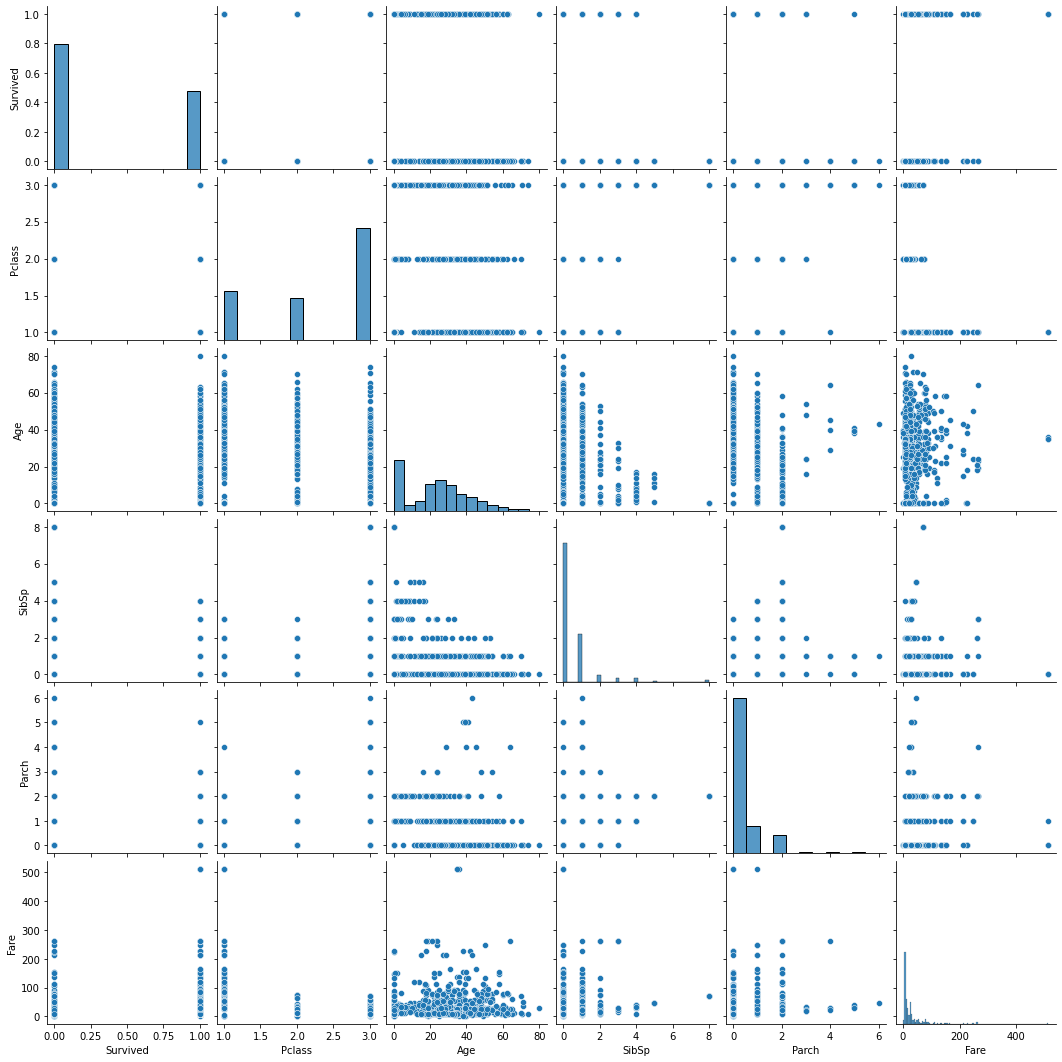

In [22]:
sns.pairplot(df1)

In [54]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


**Feature Engineering**

In [63]:
# changing the columns to numeric values 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Survived'] = le.fit_transform(df1['Survived'])
df1['Pclass'] = le.fit_transform(df1['Pclass'])


df1 = df1.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [64]:
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,1,1,29,0,0,21,3
887,1,0,0,17,0,0,103,3
888,0,2,0,0,1,2,78,3
889,1,0,1,28,0,0,103,1
890,0,2,1,37,0,0,186,2


In [65]:
# Splitting to features and labels 
X = df1.drop('Survived',axis=1)
y = df1['Survived']

In [66]:
# Importing standard scaler to scale our data and reduce the effect of outliers 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Modelling**

80-20 split

In [68]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [71]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6424581005586593

In [72]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85 25]
 [39 30]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       110
           1       0.55      0.43      0.48        69

    accuracy                           0.64       179
   macro avg       0.62      0.60      0.61       179
weighted avg       0.63      0.64      0.63       179



70-30 split

In [74]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [75]:

# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [77]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6529850746268657

In [78]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[128  40]
 [ 53  47]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       168
           1       0.54      0.47      0.50       100

    accuracy                           0.65       268
   macro avg       0.62      0.62      0.62       268
weighted avg       0.64      0.65      0.65       268



60-40 split

In [79]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [80]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [82]:

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6302521008403361

In [83]:

# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[165  56]
 [ 76  60]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       221
           1       0.52      0.44      0.48       136

    accuracy                           0.63       357
   macro avg       0.60      0.59      0.60       357
weighted avg       0.62      0.63      0.62       357



Since we have 70-30 split as our best accuracy so far with 65%. So we gonna perform LDA to improve our accuracy

In [84]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [90]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [91]:
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[156  12]
 [ 39  61]]
Accuracy0.8097014925373134
